In [1]:
library(fpp3)

── Attaching packages ──────────────────────────────────────────── fpp3 0.4.0 ──
✔ tibble      3.1.0     ✔ tsibble     1.0.0
✔ dplyr       1.0.5     ✔ tsibbledata 0.2.0
✔ tidyr       1.1.3     ✔ feasts      0.1.7
✔ lubridate   1.7.4     ✔ fable       0.3.0
✔ ggplot2     3.3.3     
── Conflicts ───────────────────────────────────────────────── fpp3_conflicts ──
✖ lubridate::date()       masks base::date()
✖ dplyr::filter()         masks stats::filter()
✖ tsibble::intersect()    masks base::intersect()
✖ tsibble::interval()     masks lubridate::interval()
✖ dplyr::lag()            masks stats::lag()
✖ tsibble::new_interval() masks lubridate::new_interval()
✖ tsibble::setdiff()      masks base::setdiff()
✖ tsibble::union()        masks base::union()


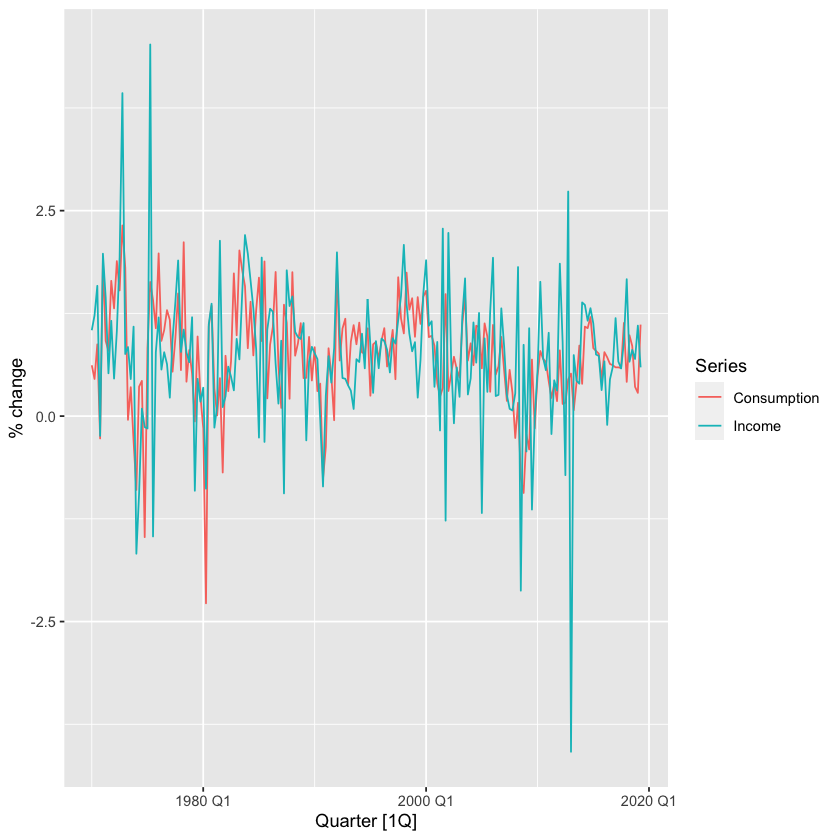

In [6]:
us_change %>%
    pivot_longer(c(Consumption, Income), names_to="Series") %>%
    autoplot(value) +
    labs(y = "% change")

`geom_smooth()` using formula 'y ~ x'


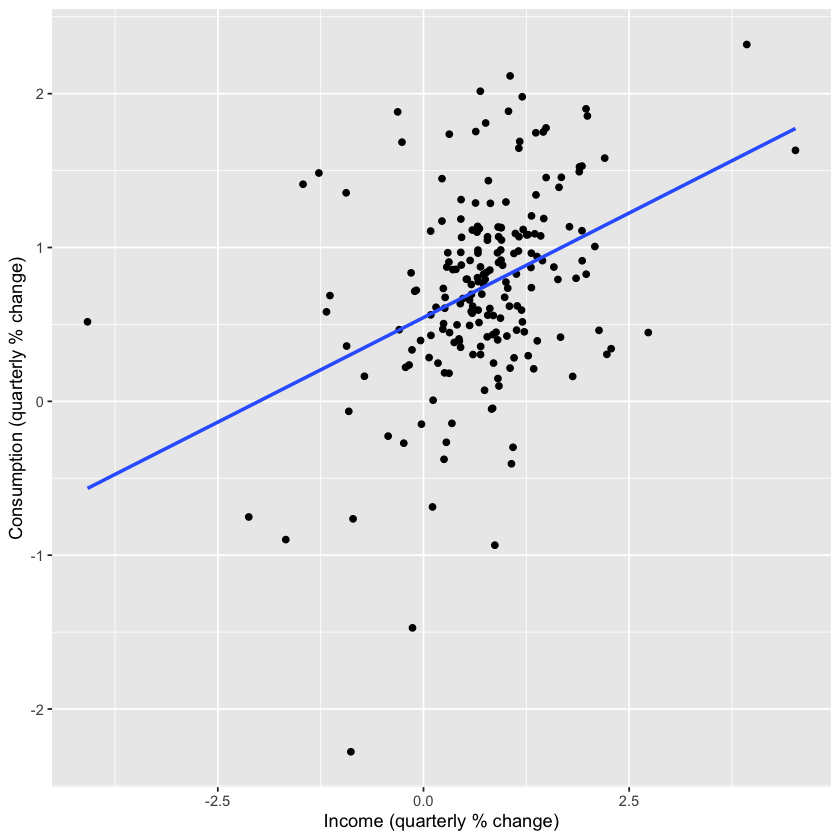

In [9]:
us_change %>%
    ggplot(aes(Income, Consumption)) +
    labs(y = "Consumption (quarterly % change)", x = "Income (quarterly % change)") +
    geom_point() +
    geom_smooth(method = "lm", se = FALSE)

In [11]:
us_change %>%
    model(TSLM(Consumption ~ Income)) %>%
    report

Series: Consumption 
Model: TSLM 

Residuals:
     Min       1Q   Median       3Q      Max 
-2.58236 -0.27777  0.01862  0.32330  1.42229 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.54454    0.05403  10.079  < 2e-16 ***
Income       0.27183    0.04673   5.817  2.4e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5905 on 196 degrees of freedom
Multiple R-squared: 0.1472,	Adjusted R-squared: 0.1429
F-statistic: 33.84 on 1 and 196 DF, p-value: 2.4022e-08


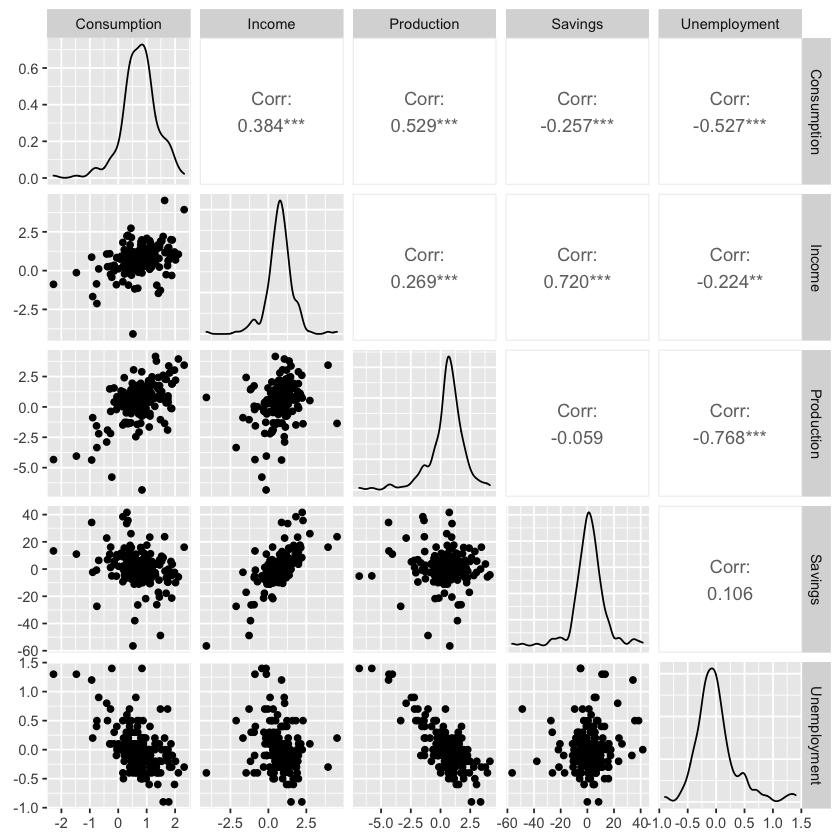

In [14]:
us_change %>%
    GGally::ggpairs(columns = 2:6)

In [16]:
fit.consMR <- us_change %>%
    model(tslm = TSLM(Consumption ~ Income + Production + Unemployment + Savings))

fit.consMR %>% report()

Series: Consumption 
Model: TSLM 

Residuals:
     Min       1Q   Median       3Q      Max 
-0.90555 -0.15821 -0.03608  0.13618  1.15471 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.253105   0.034470   7.343 5.71e-12 ***
Income        0.740583   0.040115  18.461  < 2e-16 ***
Production    0.047173   0.023142   2.038   0.0429 *  
Unemployment -0.174685   0.095511  -1.829   0.0689 .  
Savings      -0.052890   0.002924 -18.088  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3102 on 193 degrees of freedom
Multiple R-squared: 0.7683,	Adjusted R-squared: 0.7635
F-statistic:   160 on 4 and 193 DF, p-value: < 2.22e-16


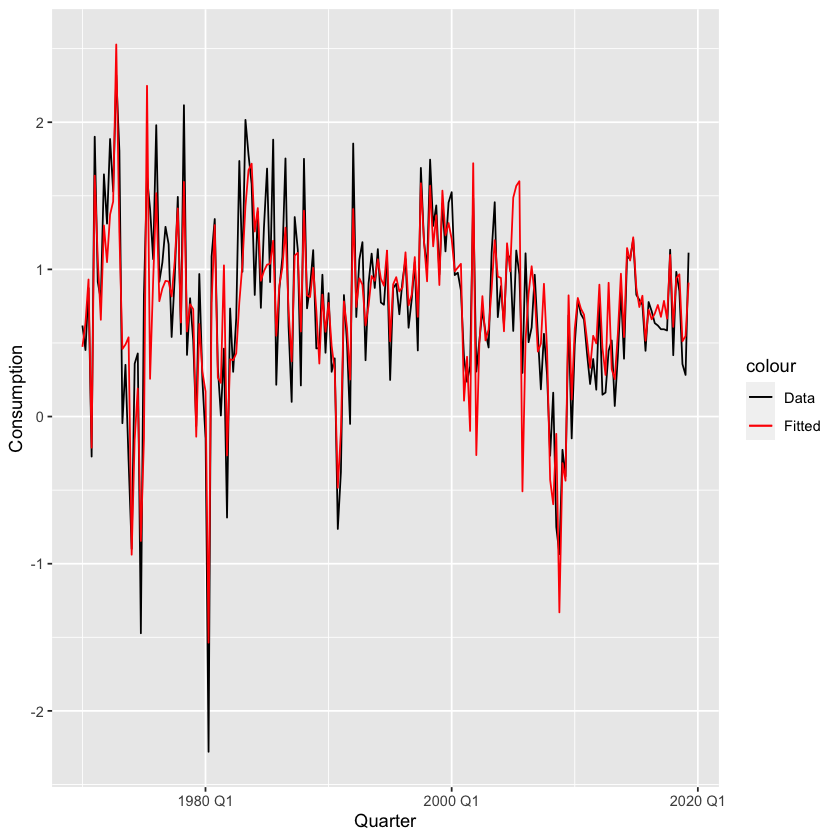

In [19]:
augment(fit.consMR) %>%
    ggplot(aes(Quarter)) +
    geom_line(aes(y = Consumption, color = "Data")) +
    geom_line(aes(y = .fitted, color = "Fitted")) +
    scale_color_manual(values=c(Data="black", Fitted="red"))

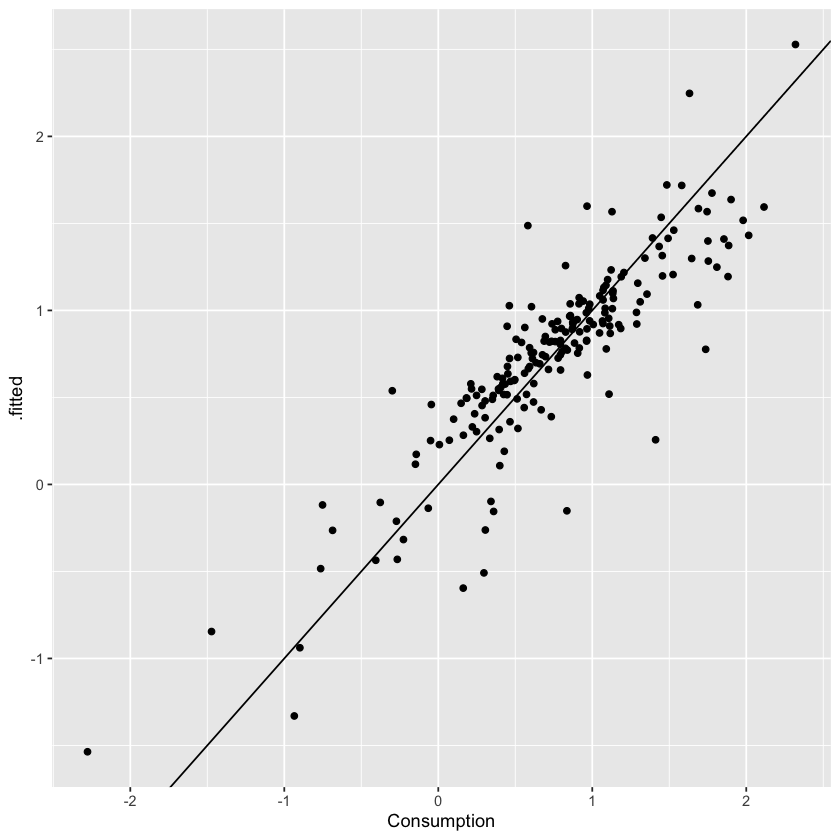

In [22]:
augment(fit.consMR) %>%
    ggplot(aes(Consumption, .fitted)) +
    geom_point() +
    geom_abline(intercept = 0, slope = 1)